In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\Logistic Regression Dummy Data v3.csv")
# print the shape
print(data.shape)
data.head(5)

(1006, 14)


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan Amount,1003.0,-543621.497507,1.732054e+07,-548541254.0,1374.5,2326.0,3981.5,18427.0
Age,1002.0,35.841317,1.465718e+01,18.0,27.0,33.0,42.0,327.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type of Account        1004 non-null   object 
 1   Account History        1004 non-null   object 
 2   Reason for the Loan    1003 non-null   object 
 3   Loan Amount            1003 non-null   float64
 4   Account Savings        1002 non-null   object 
 5   Employment History     1001 non-null   object 
 6   Individual Stauts      1001 non-null   object 
 7   Other Loans            1001 non-null   object 
 8   Security / Collateral  1001 non-null   object 
 9   Age                    1002 non-null   float64
 10  Residence Status       1002 non-null   object 
 11  Job                    1002 non-null   object 
 12  Completed Other loan?  1002 non-null   object 
 13  Good Loan              1001 non-null   object 
dtypes: float64(2), object(12)
memory usage: 110.2+ KB


In [5]:
data.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [6]:
# pip install missingno

<Axes: >

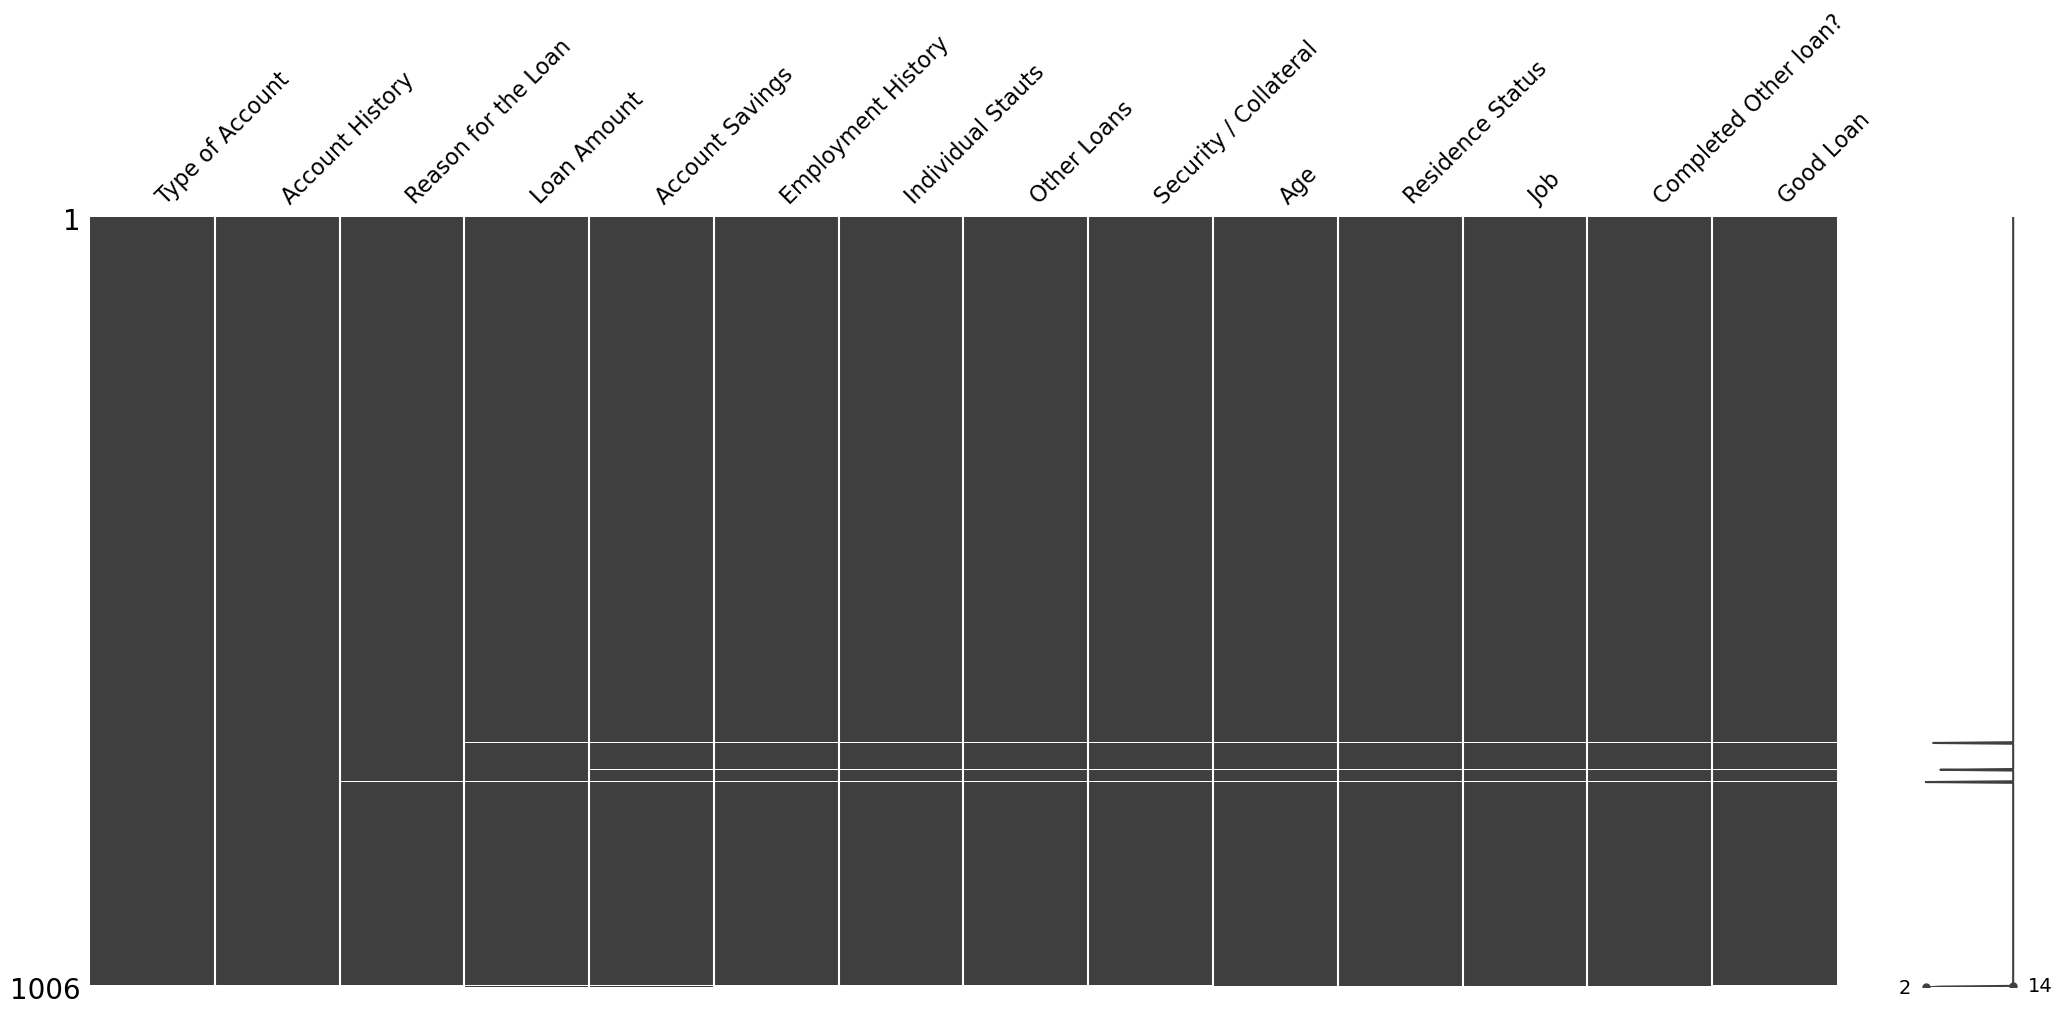

In [7]:
import missingno as msno
msno.matrix(data)

In [8]:
data[data['Employment History'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data = data.dropna(subset = ['Employment History'])
print(data.isnull().sum())
data.shape

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64


(1001, 14)

In [10]:
data.nunique().to_frame(name = "Count")

,Count
Type of Account,4
Account History,3
Reason for the Loan,10
Loan Amount,911
Account Savings,5
Employment History,5
Individual Stauts,5
Other Loans,2
Security / Collateral,4
Age,57


In [11]:
for column in data:
    unique_val = np.unique(data[column])
    nr_val = len(unique_val)
    if nr_val <= 10:
        print(f"The number of values for feature {column} is: {nr_val} -- {unique_val}")
    else:
        print(f"The number of values for feature {column} is: {nr_val}")
    

The number of values for feature Type of Account is: 4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature Account History is: 3 -- ['Average (known delays)' 'Good' 'critical']
The number of values for feature Reason for the Loan is: 10 -- ['Advance Edu/training' 'All other' 'Buying a New Car' 'Buying a Used Car'
 'Home Devices' 'Home furniture' 'Learning / Edu purposes' 'Renovation'
 'Support for Business' 'TV']
The number of values for feature Loan Amount is: 911
The number of values for feature Account Savings is: 5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of values for feature Employment History is: 5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of values for feature Individual Stauts is: 5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of values for feature Other Loans is: 2 -- ['No' 'Yes']
The number of values for feature Security / Collateral is: 4 -- ['No Security' 'Property - Real Estat

In [12]:
# g = sns.pairplot(data)

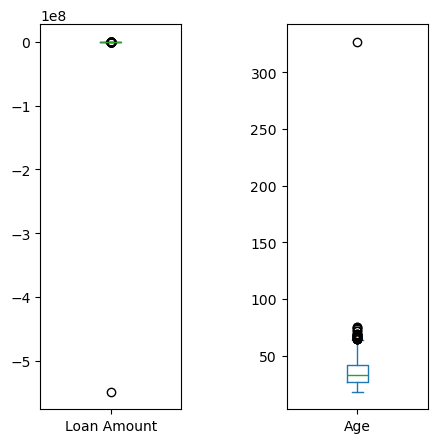

In [13]:
# Multiple boxplots in a single visualization.
# Columns with larger scales affect other columns. 
# Below code ensures each column gets its own y-axis.

# pandas plot() function with parameters kind = 'box' and subplots = True

data.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5)) 

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show() 

#### Data Cleaning

In [14]:
# Deleting the outlier

data = data[data['Age'] < 100]
data.shape

(1000, 14)

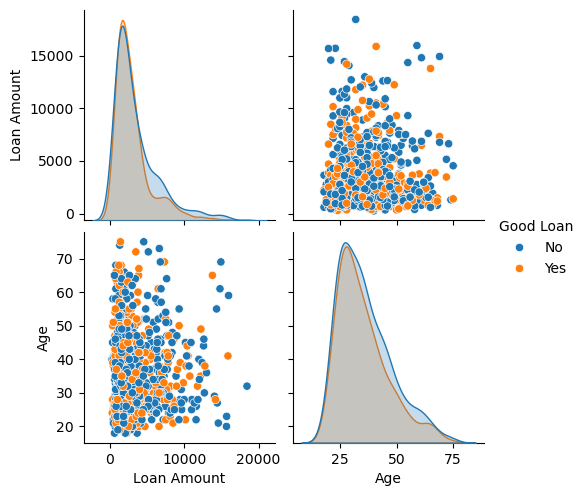

In [15]:
g = sns.pairplot(data, hue = 'Good Loan')

C:\Users\HP\AppData\Local\Temp\ipykernel_11812\3157493541.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Good Loan', data = data, palette = 'Set3')


<Axes: xlabel='Good Loan', ylabel='count'>

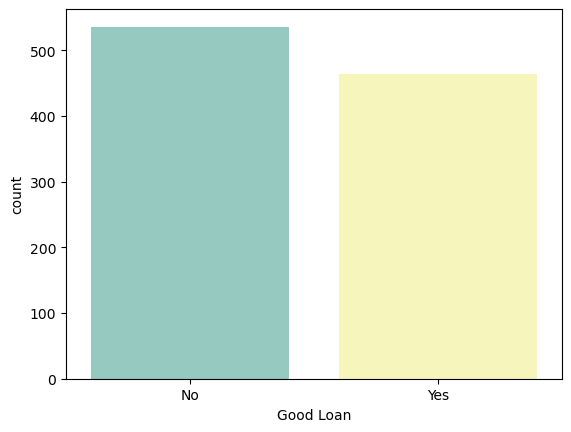

In [16]:
sns.countplot(x = 'Good Loan', data = data, palette = 'Set3')

In [17]:
data.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

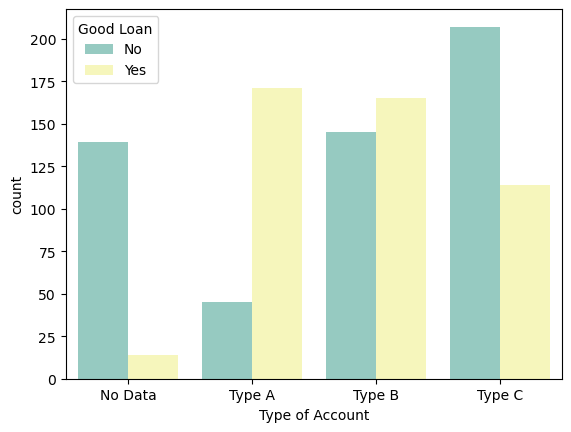

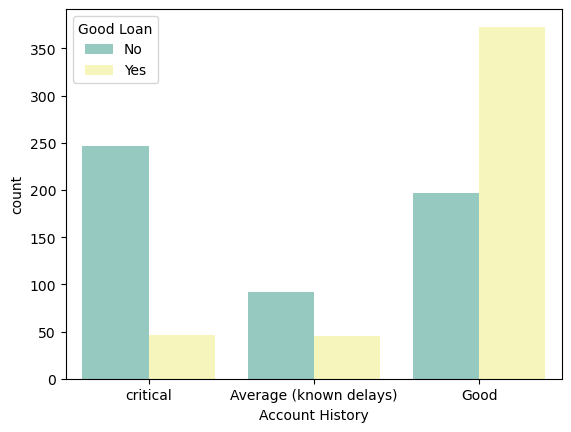

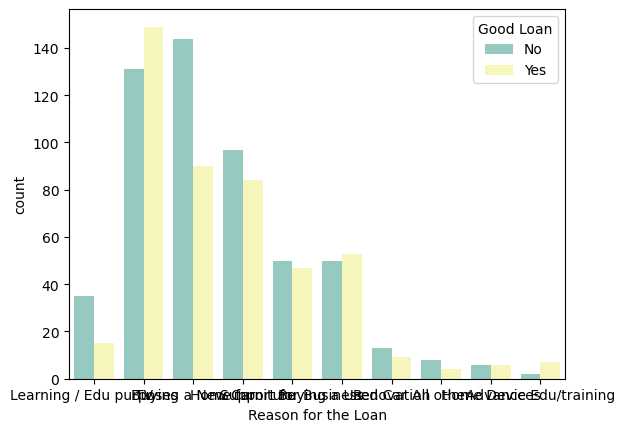

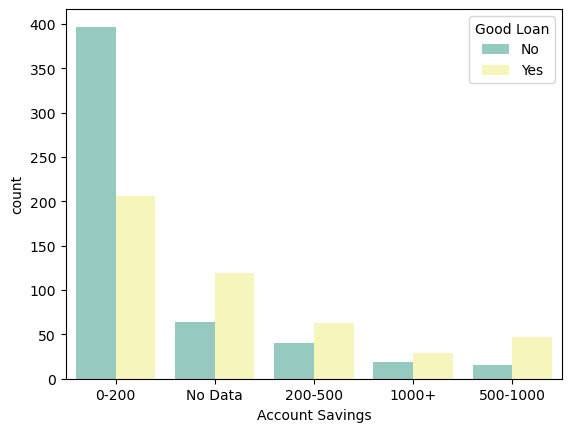

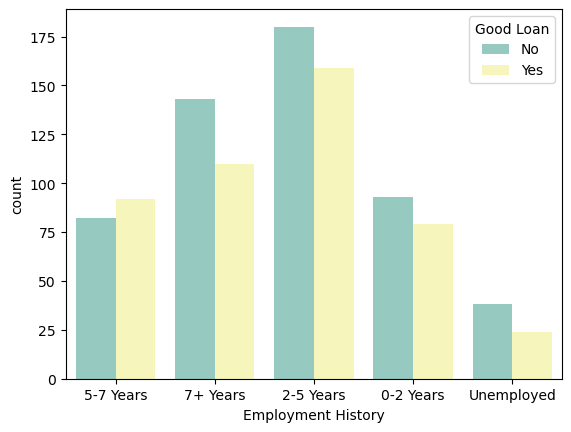

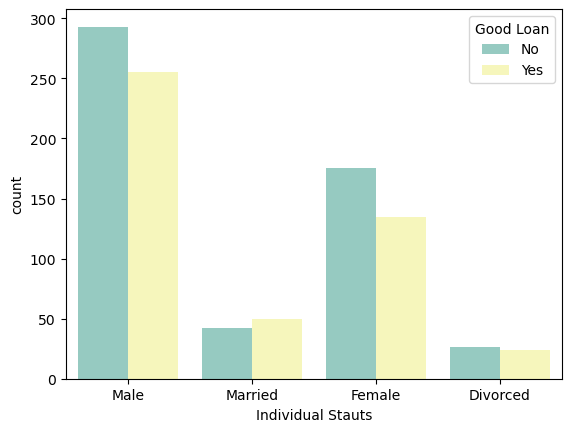

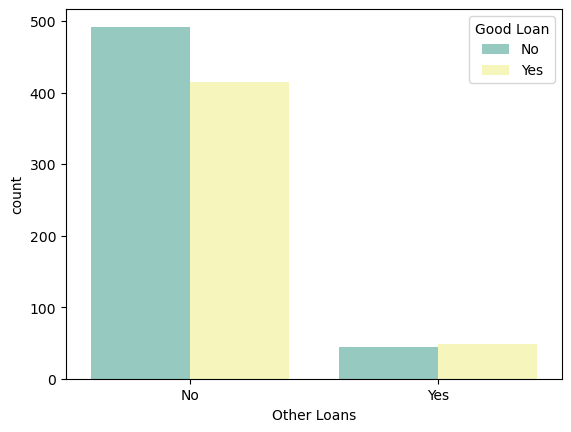

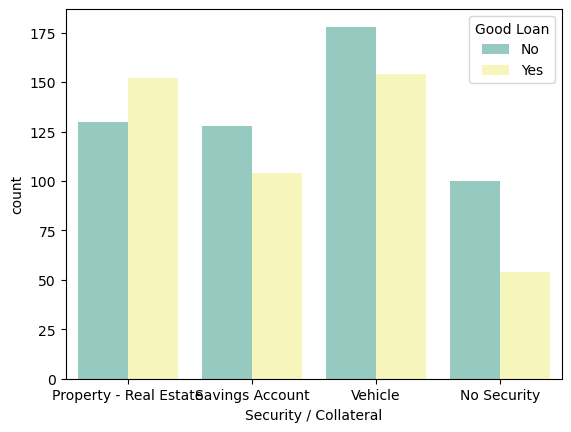

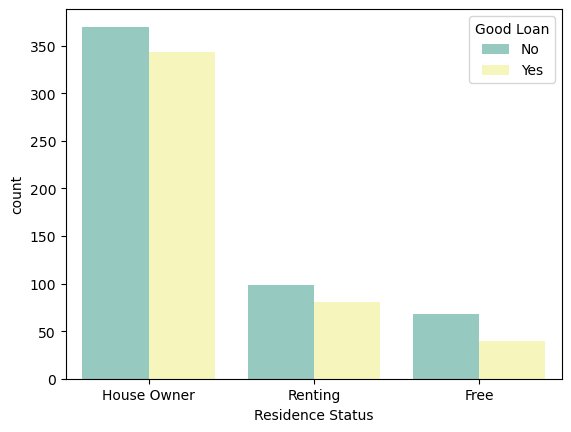

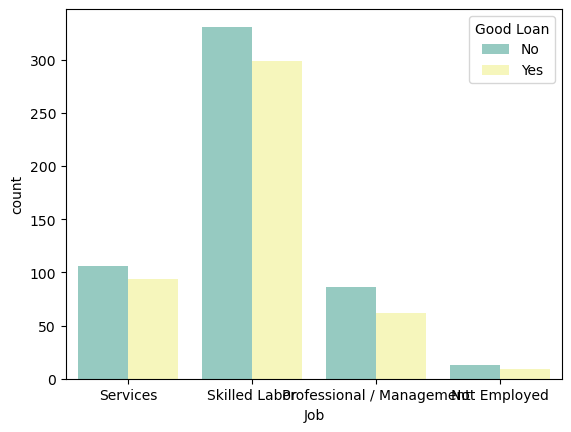

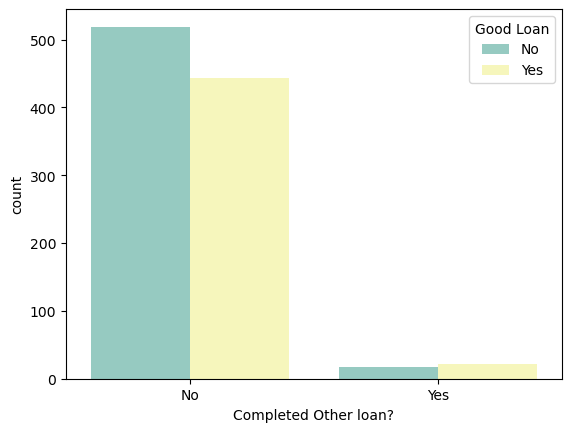

In [18]:
features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    sns.countplot(x = f, data = data, palette = 'Set3', hue = 'Good Loan')
    plt.show()

In [19]:
data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [20]:
# Making categorical variables into numeric representation

new_data = pd.get_dummies(data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(data.shape)
# print the shape
print(new_data.shape)


# Creating a new 0-1 y variable
#new_raw_data['Loan Approved2'] = 0
new_data.loc[new_data['Good Loan'] == 'Yes', 'Good Loan'] = 1
new_data.loc[new_data['Good Loan'] == 'No',  'Good Loan'] = 0

# Convert all boolean columns to int (True -> 1, False -> 0)
bool_cols = new_data.select_dtypes(include=['bool']).columns
new_data[bool_cols] = new_data[bool_cols].astype(int)
# Visualizing the data
new_data

(1000, 14)
(1000, 49)


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


### Feature Selection

#### Steps of Running Feature Importance
- Split the data into X & y
- Run a Tree-based estimator (i.e. Decision Tree or Random Forest)
- Check Feature Importance values
nce

In [21]:
X = new_data.drop('Good Loan', axis = 1).values
y = new_data['Good Loan']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1000, 48)
(1000,)


In [22]:
print(y.value_counts())

Good Loan
0    536
1    464
Name: count, dtype: int64


### Splitting the Raw Data - Hold-out validation


In [23]:
print(new_data.shape)
new_data.head()

(1000, 49)


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [24]:
# Hold-out validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(720, 48)
(200, 48)
(80, 48)
(720,)
(200,)
(80,)


### ✅ What is Logistic Regression?

- Logistic Regression is a **statistical method** used for predicting **binary classes** (e.g., 0/1, Yes/No).
- It is mainly used for **classification problems**, not for predicting continuous numeric values.
- To make it work, we transform the **linear regression line** into an **S-shaped logistic curve** so that we get a better fit for classification data.
- Logistic function (also called sigmoid function) outputs values between **0 and 1**, which can be interpreted as probabilities.
cation.
ow)

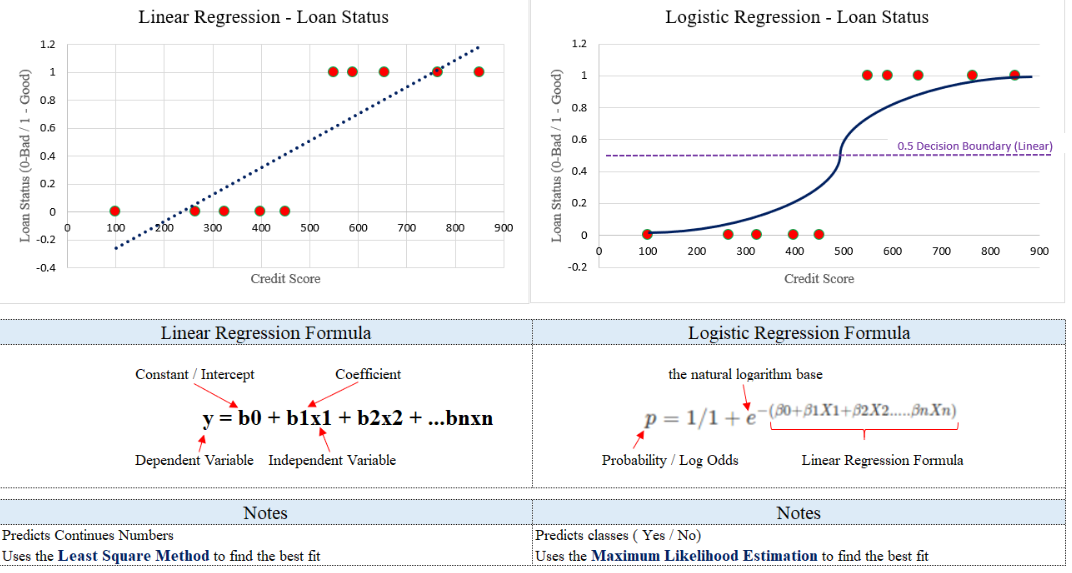

In [25]:
from IPython.display import Image
img = Image(filename=r"C:\Users\HP\OneDrive\Pictures\Screenshots\Screenshot 2025-08-16 143200.png", width=900, height=900)
img


In [26]:
# Training my model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')
log_reg.fit(X_train, y_train)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [27]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[-1.30574097e-04,  7.53949514e-03, -1.02176686e+00,
         9.62274960e-01,  3.13425424e-01, -1.84797799e-01,
        -2.22079148e-01,  1.27810768e+00, -9.86892801e-01,
         1.26531931e-01, -2.03435330e-02, -6.76856965e-01,
         5.52725743e-01, -3.97261891e-02,  3.82466569e-01,
        -2.82963759e-01, -2.18869420e-01,  1.60407862e-01,
         8.57634892e-02, -1.39588201e+00,  3.83154493e-01,
         1.28957236e-01,  4.51740526e-01,  5.01165488e-01,
        -4.73637825e-01, -1.33896829e-01,  5.82746942e-01,
         2.66627519e-02,  6.72606888e-02,  3.35296900e-02,
        -1.52844041e-01,  1.53958400e-01,  3.44916807e-02,
        -1.43796203e-01,  2.12931932e-01, -4.29714194e-01,
         5.38632381e-01,  1.13776579e-02, -5.11601150e-02,
         4.02121712e-02,  1.25854357e-01, -9.69307985e-02,
        -3.58650799e-02,  1.40655585e-01, -6.23072881e-02,
         2.66525128e-02, -1.27046822e-01,  1.96182551e-01]])

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7763888888888889
The Testing Accuracy is:  0.78
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       387
           1       0.76      0.75      0.76       333

    accuracy                           0.78       720
   macro avg       0.78      0.77      0.77       720
weighted avg       0.78      0.78      0.78       720



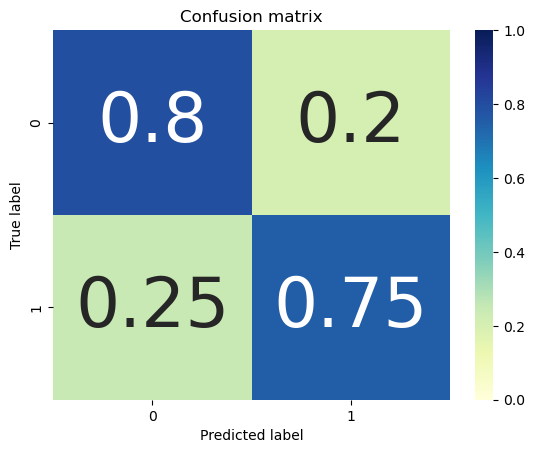

In [32]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [33]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.79586563 0.75375375]
The Precision is: [0.78974359 0.76060606]
The False positive rate is: [0.24624625 0.20413437]
The False Negative Rate is:  [0.20413437 0.24624625]

The average TPR is: 0.7748096934143446
The average Precision is: 0.7751748251748252
The average False positive rate is: 0.22519030658565542
The average False Negative Rate is: 0.22519030658565542


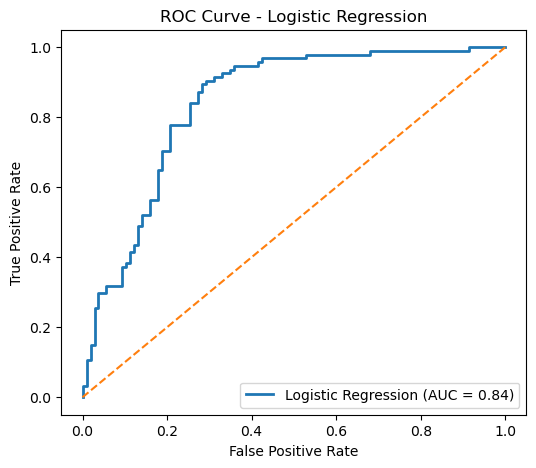

In [35]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC
y_proba = log_reg.predict_proba(X_test)[:, 1]   # probability for class 1

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

# Predictions & Probabilities
y_pred_log = log_reg.predict(X_test)
y_proba_log = log_reg.predict_proba(X_test)[:,1]

# Basic metrics
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
auc_score = roc_auc_score(y_test, y_proba_log)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", auc_score)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion matrix:")
print(cm)


Accuracy: 0.78
Precision: 0.7659574468085106
Recall: 0.7659574468085106
F1 Score: 0.7659574468085106
ROC AUC Score: 0.8412284223203533

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       106
           1       0.77      0.77      0.77        94

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

Confusion matrix:
[[84 22]
 [22 72]]


In [39]:
import pickle
# Save model as pickle file
filename = 'loan_logistic_model.pkl'
pickle.dump(log_reg, open(filename, 'wb'))

print("Model saved to", filename)

Model saved to loan_logistic_model.pkl


In [43]:
# Load model
loaded_model = pickle.load(open('loan_logistic_model.pkl', 'rb'))
print("Model loaded!")

# Take a random sample from test set
# If X_test is numpy array:
sample_array = X_test[7].reshape(1, -1)

# Predict
prediction = loaded_model.predict(sample_array)
if prediction[0] == 1:
    print("GOOD LOAN")
else:
    print("NOT GOOD LOAN")


Model loaded!
GOOD LOAN
